In [1]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


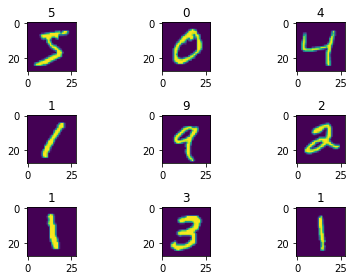

In [2]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [3]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [4]:
def sigmoid(s):
    return 1./(1+np.exp(-s))

Z = (Xtrain.T*ytrain).T
def getLossFunction(theta):
    return -np.mean(np.log(sigmoid(np.dot(Z,theta))))

def getGradient(theta):
    d = sigmoid(np.dot(Z,theta))
    return np.dot(Z.T,(d-1))/m

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ', getLossFunction(theta),np.sum(getGradient(theta)))


Check number:  45.19215648734921 12343.176947604468


In [5]:
def get_class_accuracy(theta):
    train_acc = np.mean(np.equal(ytrain,np.sign(np.dot(Xtrain,theta))))
    test_acc = np.mean(np.equal(ytest,np.sign(np.dot(Xtest,theta))))
    return train_acc, test_acc

In [6]:


stepsize = 1e-6
theta = np.zeros(n)
objval = []
train_acc = []
test_acc = []

maxiter = 2000
for iter in range(maxiter):
    if iter % 100 == 0: print(iter, maxiter)
    g = getGradient(theta)
    theta = theta - stepsize*g
    objval.append(getLossFunction(theta))
    tr,te = get_class_accuracy(theta)
    train_acc.append(tr)
    test_acc.append(te)


0 2000
100 2000
200 2000
300 2000
400 2000
500 2000
600 2000
700 2000
800 2000
900 2000
1000 2000
1100 2000
1200 2000
1300 2000
1400 2000
1500 2000
1600 2000
1700 2000
1800 2000
1900 2000


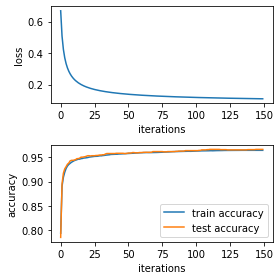

In [14]:
plt.figure(figsize=(4,4))
plt.subplot(2,1,1)
plt.plot(objval)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.subplot(2,1,2)
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend(['train accuracy','test accuracy'])
plt.tight_layout()
plt.savefig('mnist_perf.png')

In [8]:
print(train_acc[-1], test_acc[-1])

0.9658213891951488 0.9683576092415871


In [9]:

    
def getStochGradient(theta, minibatch):
    d = sigmoid(np.dot(Z[minibatch,:],theta))
    return np.dot(Z[minibatch,:].T,(d-1))/len(minibatch)
    
# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ',np.sum(getStochGradient(theta,[1,4,6,2])))


Check number:  5803.5


In [10]:
stepsize = 1e-6
theta = np.zeros(n)
train_acc = []
test_acc = []
runtime = []
objval = []
maxiter = 1500
start = time()
for iter in range(maxiter):
    if iter % 100 == 0: print(iter, maxiter)
        
    g = getGradient(theta)
    theta = theta - stepsize*g
    
    if iter % 10 == 0:
        objval.append(getLossFunction(theta))
        tr,te = get_class_accuracy(theta)
        train_acc.append(tr)
        test_acc.append(te)
        runtime.append(time()-start)

0 1500
100 1500
200 1500
300 1500
400 1500
500 1500
600 1500
700 1500
800 1500
900 1500
1000 1500
1100 1500
1200 1500
1300 1500
1400 1500


In [11]:




stepsize = 1e-6
theta = np.zeros(n)
objval_stoch = []
train_acc_stoch = []
test_acc_stoch = []
runtime_stoch = []
m = Z.shape[0]
idx = np.random.permutation(m)
start = time()
minibatch_size = 50
maxiter = 50000
for iter in range(maxiter):
    if iter % 5000 == 0: print(iter, maxiter)
        
        
    if len(idx) < minibatch_size:
        idx = np.hstack([idx,np.random.permutation(m)])
    g = getStochGradient(theta, idx[:minibatch_size])
    idx = idx[minibatch_size:]
    theta = theta - stepsize*g
    
    # logging
    if iter % 100 == 0:
        
        objval_stoch.append(getLossFunction(theta))
        tr,te = get_class_accuracy(theta)
        train_acc_stoch.append(tr)
        test_acc_stoch.append(te)
        runtime_stoch.append(time()-start)


0 50000
5000 50000
10000 50000
15000 50000
20000 50000
25000 50000
30000 50000
35000 50000
40000 50000
45000 50000


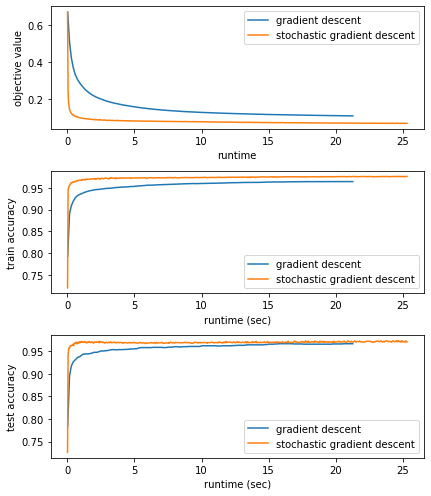

In [12]:
plt.figure(figsize=(6,7))

plt.subplot(3,1,1)
plt.plot(runtime,objval,label='gradient descent')
plt.plot(runtime_stoch,objval_stoch, label = 'stochastic gradient descent')
plt.xlabel('runtime')
plt.ylabel('objective value')
plt.legend()

plt.subplot(3,1,2)
plt.plot(runtime,train_acc,label='gradient descent')
plt.plot(runtime_stoch,train_acc_stoch, label = 'stochastic gradient descent')
plt.xlabel('runtime (sec)')
plt.ylabel('train accuracy')
plt.legend()

plt.subplot(3,1,3)
plt.plot(runtime,test_acc,label='gradient descent')
plt.plot(runtime_stoch,test_acc_stoch, label = 'stochastic gradient descent')
plt.xlabel('runtime (sec)')
plt.ylabel('test accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('mnist_stoch_perf.png')